# Project 1 
## Description: Systematic roll up of annotation terms from a broad set of sources.

The planned outcome is a method to classify/aggregate terms for end-users in a systematic, explainable, and defensible way. The intention is to help end-users when they are ask, “what does your platform cover?”. That is a complex question that depends on what is of interest to the users and the context of the question but providing a list of 7000 features with some annotation or links is not a satisfying answer.

## Outcome
The ideal outcome is to be able to respond to a user: ‘What is your primary area of interest?’ then go to a high-level classification of terms related to the user’s interest and approach to proteomics (and be able to drill down from that high level).

In [1]:
pip install sentence_transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [3]:
#import required libraries
#import os
import pandas as pd

#1. Preprocess the GO Biological Process Data 

In [6]:
pwd

'/Users/raymondotoo/Desktop/Dropbox/SomaLogic/Project1'

In [7]:
#This file contains all of the GO biological process annotatations.  Some are missing GO ID's,these exist in UniProt but are depricated in GO. 
#There is a need to curate and update these annotations. Each row consists of a single GO annotation, its go id, the type of relationship it has to its parent term(s), and a pipe '|' delimited list of parent GO Id's 
GO_BiologicalProcess_GO_Relationships_20220615 = pd.read_csv('GO_BiologicalProcess_GO_Relationships_20220615.csv')
GO_BiologicalProcess_GO_Relationships_20220615

,go_name,go_id,rel_type,parent_terms
0,coenzyme biosynthetic process,NaN,NaN,NaN
1,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
2,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
3,entry of bacterium into host cell,GO:0035635,INSTANCE_OF,NaN
4,entry into host cell,NaN,NaN,NaN
...,...,...,...,...
29196,gliotoxin biosynthetic process,GO:2001310,IS_A,GO:0044272|GO:0018130|GO:1901605|GO:2001308|GO...
29197,6-sulfoquinovose(1-) catabolic process to glyc...,GO:0061720,IS_A,GO:0006796|GO:0006081|GO:0019637|GO:1902652|GO...
29198,novobiocin biosynthetic process,GO:0043642,IS_A,GO:1901566|GO:0017000|GO:1901503|GO:0043604|GO...
29199,doxorubicin metabolic process,GO:0044598,IS_A,GO:0006725|GO:0006807|GO:1901661|GO:1901360|GO...


In [8]:
#Using main list of GO terms
GO_BiologicalProcess_GO_Relationships_20220615

,go_name,go_id,rel_type,parent_terms
0,coenzyme biosynthetic process,NaN,NaN,NaN
1,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
2,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
3,entry of bacterium into host cell,GO:0035635,INSTANCE_OF,NaN
4,entry into host cell,NaN,NaN,NaN
...,...,...,...,...
29196,gliotoxin biosynthetic process,GO:2001310,IS_A,GO:0044272|GO:0018130|GO:1901605|GO:2001308|GO...
29197,6-sulfoquinovose(1-) catabolic process to glyc...,GO:0061720,IS_A,GO:0006796|GO:0006081|GO:0019637|GO:1902652|GO...
29198,novobiocin biosynthetic process,GO:0043642,IS_A,GO:1901566|GO:0017000|GO:1901503|GO:0043604|GO...
29199,doxorubicin metabolic process,GO:0044598,IS_A,GO:0006725|GO:0006807|GO:1901661|GO:1901360|GO...


In [10]:
#convert the GO terms to a list
GO_terms_list = GO_BiologicalProcess_GO_Relationships_20220615['go_name'].tolist()
GO_terms_list

['coenzyme biosynthetic process',
 'evasion or tolerance by symbiont of host-produced reactive oxygen species',
 'evasion or tolerance by symbiont of host-produced nitric oxide',
 'entry of bacterium into host cell',
 'entry into host cell',
 'viral entry into host cell',
 'active induction of host immune response by virus',
 '2-oxoglutarate metabolic process',
 'porphyrin-containing compound metabolic process',
 'biological_process',
 'maternal determination of dorsal/ventral axis',
 'maternal determination of dorsal/ventral axis',
 'mesodermal cell migration',
 'axo-dendritic transport',
 'anterograde axonal transport',
 'retrograde axonal transport',
 'metabolic process',
 'actin polymerization or depolymerization',
 'glucocorticoid metabolic process',
 'protein alkylation',
 'protein dealkylation',
 'spermine metabolic process',
 'spermidine metabolic process',
 'regulation of blood pressure',
 'bioluminescence',
 'cell death',
 'opsonization',
 'head involution',
 'regulation of G

In [11]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# 2. Cluster the GO terms into the most similar terms using some pretrained models as a starting point for the clustering. A more specific model could be trained as need be should the available pretrained models perform poorly as per the context in question.

In [ ]:
 #Took about 12 mins to run when ran on colab's server.
corpus_embeddings = embedder.encode(GO_terms_list)

In [9]:
from sklearn.cluster import KMeans
num_clusters = 10

# Define kmeans model
clustering_model = KMeans(n_clusters=num_clusters)

In [10]:
# Fit the embedding with kmeans clustering.
clustering_model.fit(corpus_embeddings)
# Get the cluster id assigned to each GO term.
cluster_assignment = clustering_model.labels_

In [11]:
print(cluster_assignment)

[3 4 0 ... 6 4 6]


In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(GO_terms_list[sentence_id])

#loop through the cluster and print each clustered along with its assigned term as suggested by the model
for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

In [54]:
#GO_clusters = pd.DataFrame(clustered_sentences)
#Transpose to convert the rows to columns and vice versa
GO_clusters = pd.DataFrame(clustered_sentences).transpose()
#final_GO_clusters

#Rename the columns by adding cluster prefix to the column names
final_GO_clusters = GO_clusters.add_prefix("cluster_")
final_GO_clusters

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,evasion or tolerance by symbiont of host-produ...,mesodermal cell migration,regulation of G protein-coupled receptor signa...,coenzyme biosynthetic process,evasion or tolerance by symbiont of host-produ...,regulation of blood pressure,retrograde axonal transport,regulation of smoothened signaling pathway,negative gravitropism,entry of bacterium into host cell
1,biological_process,axo-dendritic transport,gurken signaling pathway,2-oxoglutarate metabolic process,porphyrin-containing compound metabolic process,light-induced release of internally sequestere...,actin polymerization or depolymerization,soluble molecule recognition,negative regulation of epidermal growth factor...,entry into host cell
2,maternal determination of dorsal/ventral axis,cell death,regulation of Wnt signaling pathway,7-methylguanosine metabolic process,metabolic process,circadian rhythm,protein alkylation,brassinosteroid homeostasis,negative regulation of axonogenesis,viral entry into host cell
3,maternal determination of dorsal/ventral axis,cell population proliferation,regulation of Toll signaling pathway,glutamine family amino acid metabolic process,glucocorticoid metabolic process,blood coagulation,protein dealkylation,positive regulation of axonogenesis,negative regulation of cysteine-type endopepti...,active induction of host immune response by virus
4,anterograde axonal transport,glial cell migration,regulation of Notch signaling pathway,aspartate family amino acid metabolic process,spermine metabolic process,blood coagulation,larval chitin-based cuticle development,positive regulation of neurotrophin TRK recept...,negative regulation of Notch signaling pathway,pathogenesis
...,...,...,...,...,...,...,...,...,...,...
4055,None,None,None,terrequinone A biosynthetic process,None,None,None,None,None,None
4056,None,None,None,leukotriene A4 catabolic process,None,None,None,None,None,None
4057,None,None,None,leukotriene A4 biosynthetic process,None,None,None,None,None,None
4058,None,None,None,verruculogen biosynthetic process,None,None,None,None,None,None


In [ ]:
#View the number of terms assigned to each cluster(category)
final_GO_clusters.count()

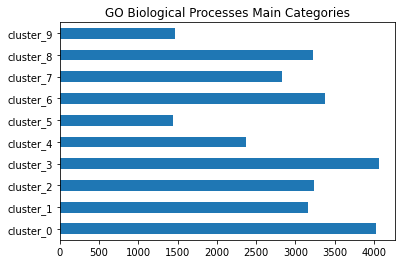

In [56]:
#Counts the non-na entries in the dataframe and columns 
final_GO_clusters.count().plot(kind='barh',title='GO Biological Processes Main Categories')

# 2. To tag each of the clusters, the most representative keyword /keyphrase can be used, modeling the data to suit the keyBERT model. KeyBERT model can be found here: https://github.com/MaartenGr/KeyBERT

In [ ]:
from pandas.core.frame import DataFrame
#First extract unique description for each column
cu = []
i = []
for cn in final_GO_clusters.columns[:num_clusters]:
    cu.append(final_GO_clusters[cn].unique())
    i.append(cn)

pd.DataFrame( cu, index=i).T

In [ ]:
final_GO_clusters.count()

In [85]:
doc = final_GO_clusters['cluster_0'].str.cat(sep='')

In [ ]:
pip install keybert

In [91]:
from keybert import KeyBERT

In [93]:
kw_model = KeyBERT()
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1,3))

[('morphogenesismale gonad developmentfemale', 0.5322),
 ('developmentfemale gonad developmentimaginal', 0.5178),
 ('morphogenesisrandom inactivation chromosomeinactivation', 0.5058),
 ('olivary nucleus maturationintermediate', 0.4984),
 ('morphogenesismale gonad', 0.4862)]

## a. Using Max Sum Similarity

In [110]:
#Test model with one column/cluster
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1,3), 
                          stop_words='english', 
                          use_maxsum=True,
                          top_n=5)

[('formationeye developmenturogenital developmentmetanephros', 0.4705),
 ('morphogenesisdosage compensation hyperactivation', 0.4738),
 ('gonad developmentfemale gonad', 0.4749),
 ('maturationinferior olivary nucleus', 0.4789),
 ('morphogenesisrandom inactivation chromosomeinactivation', 0.5058)]

In [150]:
len(clust_docs)

10

In [156]:
#Run model on all the
doc_1 = final_GO_clusters['cluster_0'].str.cat(sep='')
doc_2 = final_GO_clusters['cluster_1'].str.cat(sep='')
doc_3 = final_GO_clusters['cluster_2'].str.cat(sep='')
doc_4 = final_GO_clusters['cluster_3'].str.cat(sep='')
doc_5 = final_GO_clusters['cluster_4'].str.cat(sep='')
doc_6= final_GO_clusters['cluster_5'].str.cat(sep='')
doc_7 = final_GO_clusters['cluster_6'].str.cat(sep='')
doc_8 = final_GO_clusters['cluster_7'].str.cat(sep='')
doc_9 = final_GO_clusters['cluster_8'].str.cat(sep='')
doc_10= final_GO_clusters['cluster_9'].str.cat(sep='')

clust_docs=[doc_1,doc_2,doc_3, doc_4, doc_5,doc_6,doc_7,doc_8,doc_9,doc_10]
clust_key = []
a = 0

for i in clust_docs:
  
  j = kw_model.extract_keywords(clust_docs[a], keyphrase_ngram_range=(1,3), 
                          stop_words='english', 
                          use_maxsum=True,
                          top_n=5)
  a=a+1
  clust_key.append(j)
  


In [157]:
clust_key

[[('formationeye developmenturogenital developmentmetanephros', 0.4705),
  ('morphogenesisdosage compensation hyperactivation', 0.4738),
  ('gonad developmentfemale gonad', 0.4749),
  ('maturationinferior olivary nucleus', 0.4789),
  ('morphogenesisrandom inactivation chromosomeinactivation', 0.5058)],
 [('differentiationstem cell developmentstem', 0.5079),
  ('morphogenesisneural tissue regenerationextracellular', 0.5127),
  ('morphogenesiscellular developmental processcell', 0.514),
  ('biogenesisstem cell', 0.5236),
  ('tissue developmentcell migration', 0.5251)],
 [('signaling pathwayglyoxysome', 0.5323),
  ('signaling pathwayregulation cytokine', 0.5378),
  ('toll signaling pathwayregulation', 0.5577),
  ('pathwayregulation notch signaling', 0.5652),
  ('signalingregulation oxidative stress', 0.5853)],
 [('processribonucleoside diphosphate biosynthetic', 0.5384),
  ('triphosphate metabolic processdeoxyribonucleoside', 0.5386),
  ('processdeoxyribonucleotide biosynthetic processdeo

In [158]:
#clust_key
maxSum_Similarity = pd.DataFrame(clust_key)
maxSum_Similarity


,0,1,2,3,4
0,(formationeye developmenturogenital developmen...,(morphogenesisdosage compensation hyperactivat...,"(gonad developmentfemale gonad, 0.4749)","(maturationinferior olivary nucleus, 0.4789)",(morphogenesisrandom inactivation chromosomein...
1,"(differentiationstem cell developmentstem, 0.5...",(morphogenesisneural tissue regenerationextrac...,(morphogenesiscellular developmental processce...,"(biogenesisstem cell, 0.5236)","(tissue developmentcell migration, 0.5251)"
2,"(signaling pathwayglyoxysome, 0.5323)","(signaling pathwayregulation cytokine, 0.5378)","(toll signaling pathwayregulation, 0.5577)","(pathwayregulation notch signaling, 0.5652)","(signalingregulation oxidative stress, 0.5853)"
3,(processribonucleoside diphosphate biosyntheti...,(triphosphate metabolic processdeoxyribonucleo...,(processdeoxyribonucleotide biosynthetic proce...,"(metabolic processergothioneine biosynthesis, ...","(compound metabolic processresponse, 0.5428)"
4,"(metabolic processdetection chemical, 0.561)","(metabolic processzinc, 0.5624)","(metabolic processresponse chemicalregulation,...","(processpantothenate metabolic processbile, 0....",(metabolic processresponse organophosphorusres...
5,"(calcium ionregulation heart, 0.42)","(activitypositive regulation calcium, 0.4243)","(transmembrane transportregulation calcium, 0....","(muscle contractioncellular response, 0.4313)",(contractionresponse muscle activityregulation...
6,"(involved dna repairextracellular, 0.5252)",(polyadenylationhistone biotinylationdna repli...,"(repairregulation mitochondrial translational,...","(metabolic processdna methylation, 0.5396)","(mitochondrial transcriptionproduction sirna, ..."
7,"(mitosispositive regulation transcription, 0.5...","(regulation kappab phosphorylationpositive, 0....","(viral transcriptionpositive regulation, 0.5589)","(regulation kinase activitypositive, 0.5668)","(signalingpositive regulation ras, 0.5991)"
8,"(apoptosisnegative regulation, 0.5686)",(pathwaynegative regulation axonogenesisnegati...,"(specific transcriptionnegative regulation, 0....","(cell sizenegative regulation, 0.5756)","(notch signaling pathwaynegative, 0.6204)"
9,(stimulusresponse virusresponse bacteriumrespo...,"(host cell virusfungal, 0.5606)",(viruspathogenesisresponse xenobiotic stimulus...,"(host cellresponse bacteriocinregulation, 0.5651)","(membraneviral entry host, 0.587)"


## b. Using Maximal Marginal Relevance

In [ ]:
#Test model with one cluster
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1,3), 
                          stop_words='english', 
                          use_mmr=True,
                          nr_candidates=20)

In [ ]:
#run model on all the clusters
clust_key_mmr = []

for i in clust_docs:
  i = 0
  k = kw_model.extract_keywords(clust_docs[i], keyphrase_ngram_range=(1,3), 
                          stop_words='english', 
                          use_mmr=True,
                          nr_candidates=20)
  i=i+1
  clust_key_mmr.append(k)

In [ ]:
#clust_key
Maximal_Marginal_Relevance = pd.DataFrame(clust_key_mmr)
Maximal_Marginal_Relevance

In [ ]:
#Can be used to simply highlight keywords in the document 
#keywords = kw_model.extract_keywords(doc, highlight=True)

# 3. Yakes was also explored for the keyword extraction to tags the generated clusters. YAKE stands for "Yet Another Keyword Extractor".

https://github.com/LIAAD/yake

In [ ]:
pip install yake 

In [ ]:
import yake

kw_extractor = yake.KeywordExtractor(top=50)
candidates = kw_extractor.extract_keywords(doc)
candidates = [candidate[0] for candidate in candidates] 

In [ ]:
#Test on one cluster
#Initialize the Keybert model
kw_model = KeyBERT()
#keywords = kw_model.extract_keywords(doc, candidates)
kw_model.extract_keywords(doc, candidates, use_mmr=True, diversity=0.5)
#keywords

In [ ]:


#run model on all the clusters
kw_model = KeyBERT()
clust_key_yakes = []

for i in clust_docs:
  i = 0
  l = kw_model.extract_keywords(clust_docs[i], candidates, use_mmr=True, diversity=0.5)
  i=i+1
  clust_key_yakes.append(l)

#clust_key
yakes_mmr = pd.DataFrame(clust_key_yakes)
yakes_mmr